<a href="https://colab.research.google.com/github/Saikumar1422/telecom-customer-churn-prediction-/blob/main/Telecom_Churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Churn.csv')
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',len(df))
df.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
0        no       10.0           3         2.70     265.1        110   
1        no       13.7           3         3.70     161.6        123   
2        no       12.2           5         3.29     243.4        114   
3       yes        6.6           7         1.78     299.4         71   
4       yes       10.1           3         2.73     166.7        113   

  day.charge eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0      45.07    197.4         99       16.78       244.7           91   
1      27.47    195.5        103       16.62       254.4          103   
2      41.38    121.2        110       10.30       162.6          104   
3       50.9     61.9         88        5.26       196.9           89   
4      28.34    148.3        122       12.61       186.9          121   

   night.charge  customer.calls churn  
0         11.01               1    no  
1         11.45               1    no  
2          7.32               0    no  
3          8.86               2    no  
4          8.41               3    no

checking Duplicates

In [ ]:
df.drop_duplicates()
df.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
0        no       10.0           3         2.70     265.1        110   
1        no       13.7           3         3.70     161.6        123   
2        no       12.2           5         3.29     243.4        114   
3       yes        6.6           7         1.78     299.4         71   
4       yes       10.1           3         2.73     166.7        113   

  day.charge eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0      45.07    197.4         99       16.78       244.7           91   
1      27.47    195.5        103       16.62       254.4          103   
2      41.38    121.2        110       10.30       162.6          104   
3       50.9     61.9         88        5.26       196.9           89   
4      28.34    148.3        122       12.61       186.9          121   

   night.charge  customer.calls churn  
0         11.01               1    no  
1         11.45               1    no  
2          7.32               0    no  
3          8.86               2    no  
4          8.41               3    no

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, state, area.code, account.length, voice.plan, voice.messages, intl.plan, intl.mins, intl.calls, intl.charge, day.mins, day.calls, day.charge, eve.mins, eve.calls, eve.charge, night.mins, night.calls, night.charge, customer.calls, churn]
Index: []

Data Cleaning

In [ ]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [ ]:
df['day.charge'].unique()

array(['45.07', '27.47', '41.38', '50.9', '28.34', '37.98', '37.09',
       '26.69', '31.37', '43.96', '21.95', '31.91', 'Nan', '26.62',
       '20.52', '56.59', '33.39', '32.42', '32.25', '38.15', '26.37',
       '10.61', '31.11', '18.77', '13.79', '21.13', '36.21', '32.3',
       '20.28', '14.42', '38.44', '36.04', '42.43', '30.06', '37.4',
       '24.87', '22.24', '34.66', '23.87', '21.47', '29.43', '21.22',
       '14.59', '26.18', '20.55', '35.92', '27.05', '22.64', '32.62',
       '37.5', '31.64', '27.23', '25.67', '29.84', '21.57', '33.73',
       '25.3', '38.98', '32.66', '45.66', '32.93', '30.72', '22.3',
       '25.18', '42.76', '21.28', '35.97', '30.41', '41.11', '38.23',
       '42.26', '34.58', '40.09', '26.71', '51.05', '10.47', '36.4',
       '28.93', '34.19', '36.62', '28.15', '42.42', '35.8', '30.48',
       '26.84', '36.43', '26.2', '40.44', '24.46', '42.99', '30.45',
       '47.33', '27.22', '33.69', '36.06', '42.81', '27.4', '30.31',
       '25.79', '22.95', '28.99'

In [ ]:
df[df['day.charge'] == 'Nan']

Unnamed: 0 state      area.code  account.length voice.plan  \
12            13    IA  area_code_408             168         no   
27            28    MT  area_code_408              54         no   
47            48    DE  area_code_408             142         no   
4407        4408    TN  area_code_415             125         no   
4755        4756    OK  area_code_408              17         no   
4965        4966    NC  area_code_408              92         no   
4992        4993    MT  area_code_415              83         no   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  day.mins  \
12                 0        no       11.2           2         3.02     128.8   
27                 0        no       14.7           4         3.97     134.3   
47                 0        no        7.4           5         2.00     187.0   
4407               0        no        7.7           3         2.08     138.5   
4755               0        no       14.8           5         4.00     180.4   
4965               0        no       10.7           2         2.89     192.1   
4992               0        no       10.3           6         2.78     188.3   

      day.calls day.charge eve.mins  eve.calls  eve.charge  night.mins  \
12           96        Nan    104.9         71        8.92       141.1   
27           73        Nan    155.5        100       13.22       102.1   
47          133        Nan    134.6         74       11.44       242.2   
4407         96        Nan    159.7        117       13.57       212.7   
4755        121        Nan    228.5        111       19.42       199.5   
4965         87        Nan      193        122       16.41       133.4   
4992         70        Nan    243.8         88       20.72       213.7   

      night.calls  night.charge  customer.calls churn  
12            128          6.35               1    no  
27             68          4.59               3    no  
47            127         10.90               2    no  
4407           91          9.57               2    no  
4755           99          8.98               0    no  
4965           79          6.00               1    no  
4992           79          9.62               0    no

In [ ]:
df['eve.mins'].unique()

array(['197.4', '195.5', '121.2', '61.9', '148.3', '220.6', '348.5',
       '103.1', '351.6', '222', '228.5', '163.4', '104.9', '247.6',
       '307.2', '317.8', '280.9', '218.2', '212.8', '159.5', '239.7',
       '169.9', '72.9', '137.3', '245.2', '277.1', '191.1', '155.5',
       '258.2', '215.1', '136.7', '201.5', '31.2', '252.4', '195',
       '217.3', '162.5', '223.7', '187.6', '271.8', '166.8', '203.9',
       '282.2', '165.3', '225.8', '213', '162.6', '134.6', '231.3',
       '217.2', '269.8', '211.1', '190.2', '267.5', '219.7', '249.3',
       '180', '75.3', '246.5', '177.4', '178.2', '246.1', '187.8',
       '162.9', '169.5', '206.4', '216.9', '169.1', '170.5', '188.2',
       '148.9', '226.7', '157.2', '223.3', '181', '77.1', '164.4',
       '155.2', '303.5', '204.8', '136.1', '259.7', '249.2', '225.9',
       '155', '208.5', '123.4', 'Nan', '194.9', '190.9', '173', '178.4',
       '190.6', '81', '213.3', '207.3', '209.4', '205.7', '252.2', '189',
       '183.6', '173.7', '18

In [ ]:
df[df['eve.mins'] == 'Nan']

Unnamed: 0 state      area.code  account.length voice.plan  \
89            90    NJ  area_code_415             128         no   
102          103    VT  area_code_415             135         no   
110          111    MI  area_code_408             120         no   
159          160    FL  area_code_510             115        yes   
231          232    OH  area_code_415              63        yes   
254          255    TX  area_code_415              97         no   
299          300    MN  area_code_415              94         no   
345          346    VA  area_code_415             141         no   
460          461    UT  area_code_415              90         no   
557          558    TX  area_code_408              58        yes   
624          625    DC  area_code_415             126         no   
684          685    AK  area_code_408             110         no   
729          730    ME  area_code_415             151        yes   
750          751    AL  area_code_415             146        yes   
795          796    DE  area_code_415              92         no   
892          893    LA  area_code_415             109        yes   
1012        1013    ND  area_code_415             182         no   
1099        1100    HI  area_code_415             157         no   
1219        1220    KS  area_code_510              36         no   
1417        1418    AK  area_code_408             141         no   
1483        1484    NV  area_code_510             107         no   
1625        1626    WI  area_code_510             100        yes   
1699        1700    TX  area_code_408             133         no   
1778        1779    CO  area_code_510              54        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  day.mins  \
89                 0        no       13.9           4         3.75     237.9   
102                0        no       10.5           6         2.84     151.7   
110                0        no        8.3           8         2.24     165.0   
159               24        no        9.6           4         2.59     142.1   
231               36       yes       11.0           6         2.97     199.0   
254                0       yes       10.9           3         2.94     143.7   
299                0        no        6.6           5         1.78     181.5   
345                0        no        7.2           8         1.94     260.2   
460                0        no        9.6           5         2.59     261.8   
557               20        no        9.5           2         2.57     194.5   
624                0        no        5.1           2         1.38     161.4   
684                0        no       11.1           8         3.00     100.1   
729               26        no       13.4           5         3.62     196.5   
750               32        no        8.2           4         2.21     154.0   
795                0        no       10.8           4         2.92     197.0   
892               27        no       12.3           4         3.32     166.9   
1012               0        no        8.0           5         2.16     104.9   
1099               0        no        2.2           4         0.59     276.2   
1219               0        no       10.9           5         2.94     178.6   
1417               0        no       10.7           7         2.89      83.2   
1483               0       yes       10.0           3         2.70     234.1   
1625              38        no        9.8           6         2.65     224.7   
1699               0        no        8.4           3         2.27     221.1   
1778              39        no       11.3          10         3.05     117.6   

      day.calls day.charge eve.mins  eve.calls  eve.charge  night.mins  \
89          125      40.44      Nan         93       21.05       208.9   
102          82      25.79      Nan        105       10.12       180.0   
110         100      28.05      Nan         83       26.96       119.2   
159     

In [ ]:
df['day.charge'].str.isdigit().count()

5000

In [ ]:
df['eve.mins'].str.isdigit().count()

5000

In [ ]:
df['day.charge'] = df['day.charge'].replace('Nan',np.nan)

In [ ]:
df['eve.mins'] = df['eve.mins'].replace('Nan',np.nan)

In [ ]:
df.drop(['Unnamed: 0','state'],axis = 1 ,inplace = True)

In [ ]:
df.isna().sum()

area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [ ]:
df['eve.mins'].median()

201.0

In [ ]:
df['eve.mins'] = df['eve.mins'].fillna(value=df['eve.mins'].median())

In [ ]:
df['day.charge'].median()

30.62

In [ ]:
df['day.charge'] = df['day.charge'].fillna(value=df['day.charge'].median())

In [ ]:
df.isna().sum()

area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [ ]:
df['day.charge'] = df['day.charge'].astype(float)
df['eve.mins'] = df['eve.mins'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area.code       5000 non-null   object 
 1   account.length  5000 non-null   int64  
 2   voice.plan      5000 non-null   object 
 3   voice.messages  5000 non-null   int64  
 4   intl.plan       5000 non-null   object 
 5   intl.mins       5000 non-null   float64
 6   intl.calls      5000 non-null   int64  
 7   intl.charge     5000 non-null   float64
 8   day.mins        5000 non-null   float64
 9   day.calls       5000 non-null   int64  
 10  day.charge      5000 non-null   float64
 11  eve.mins        5000 non-null   float64
 12  eve.calls       5000 non-null   int64  
 13  eve.charge      5000 non-null   float64
 14  night.mins      5000 non-null   float64
 15  night.calls     5000 non-null   int64  
 16  night.charge    5000 non-null   float64
 17  customer.calls  5000 non-null   i

EDA

In [ ]:
obj = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj.append(i)
print(obj)

['area.code', 'voice.plan', 'intl.plan', 'churn']


In [ ]:
num = []
for i in df.columns:
    if df[i].dtype != 'object':
        num.append(i)
print(num)

['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls']


In [ ]:
df.nunique()

area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1961
day.calls          123
day.charge        1961
eve.mins          1876
eve.calls          126
eve.charge        1659
night.mins        1853
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

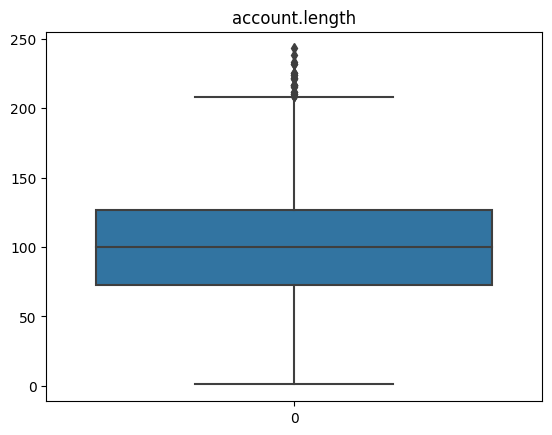

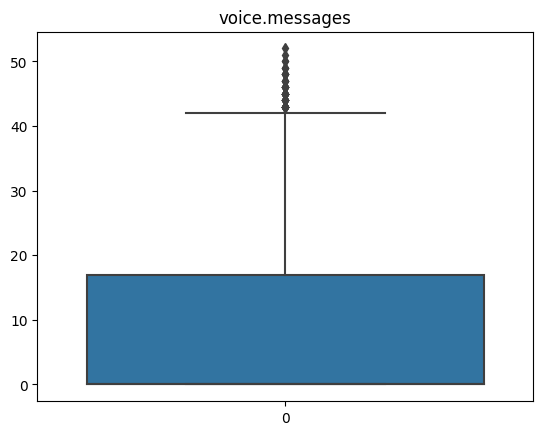

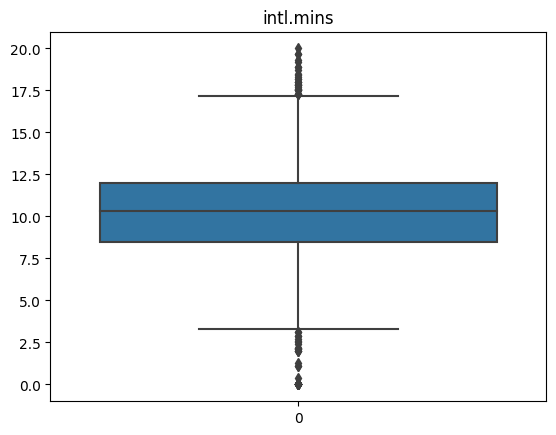

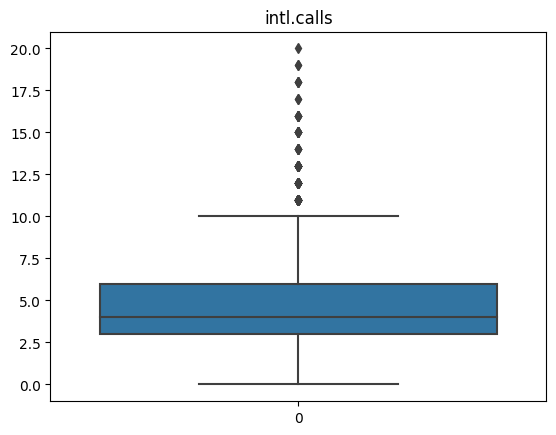

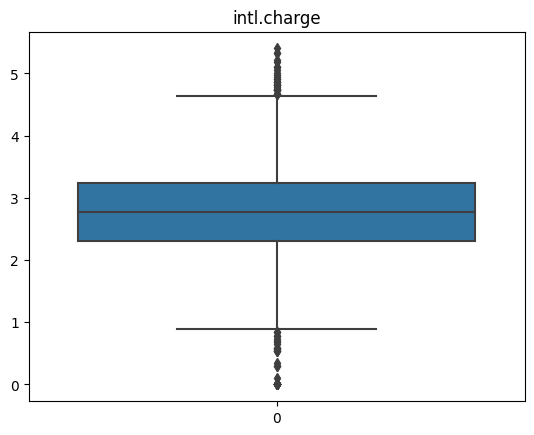

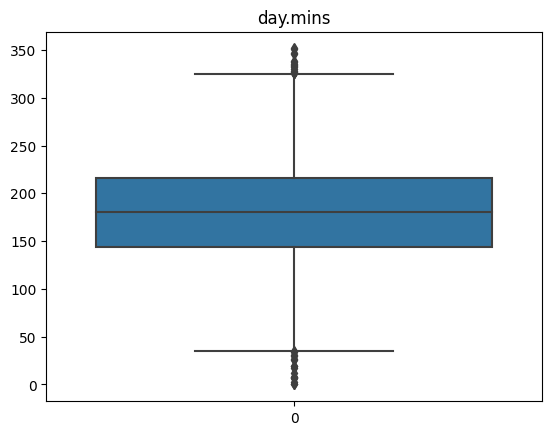

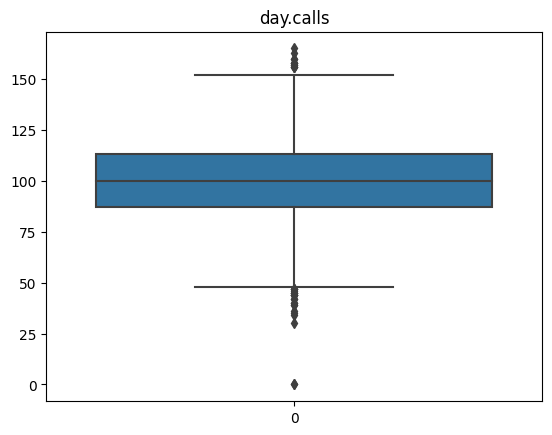

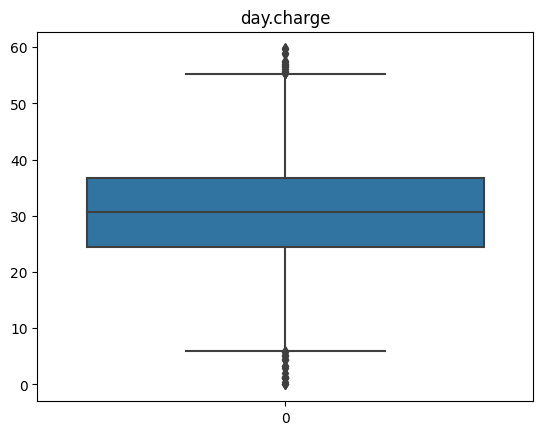

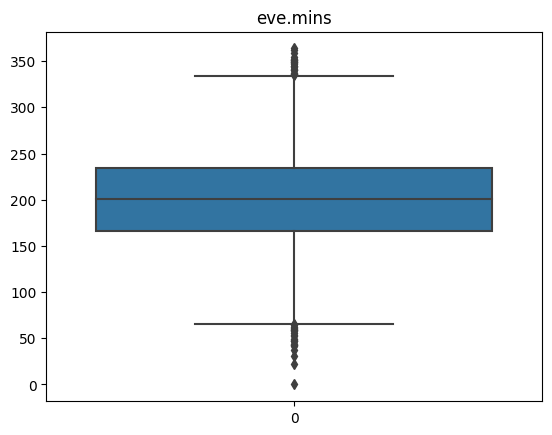

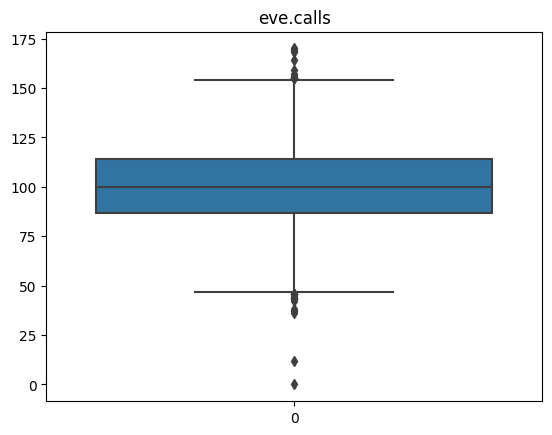

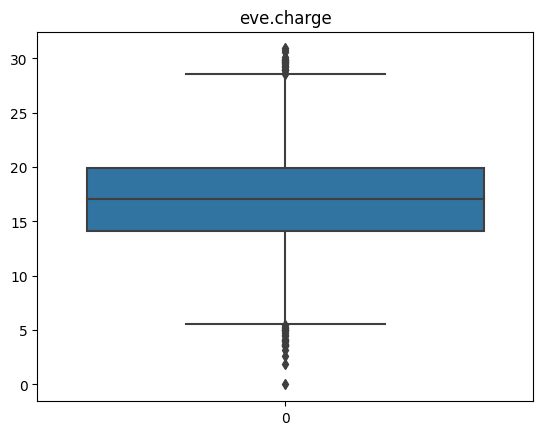

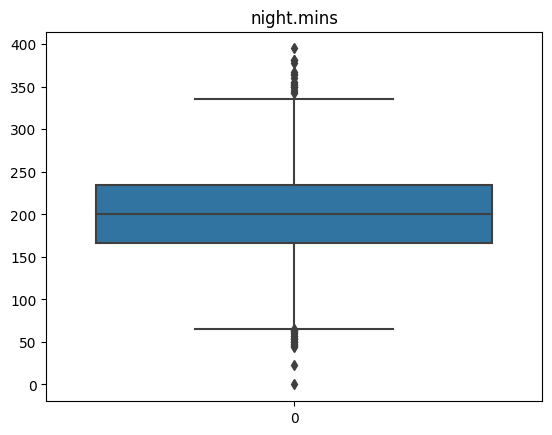

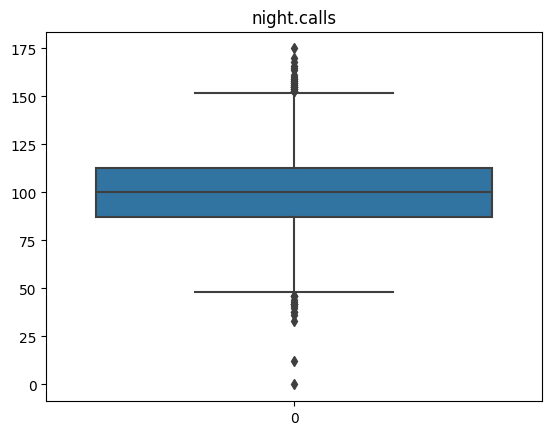

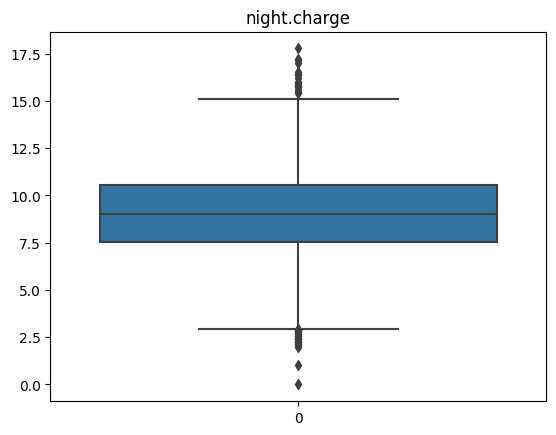

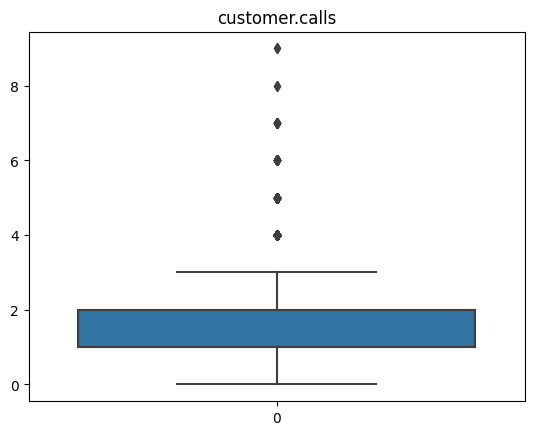

In [ ]:
for i in num:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

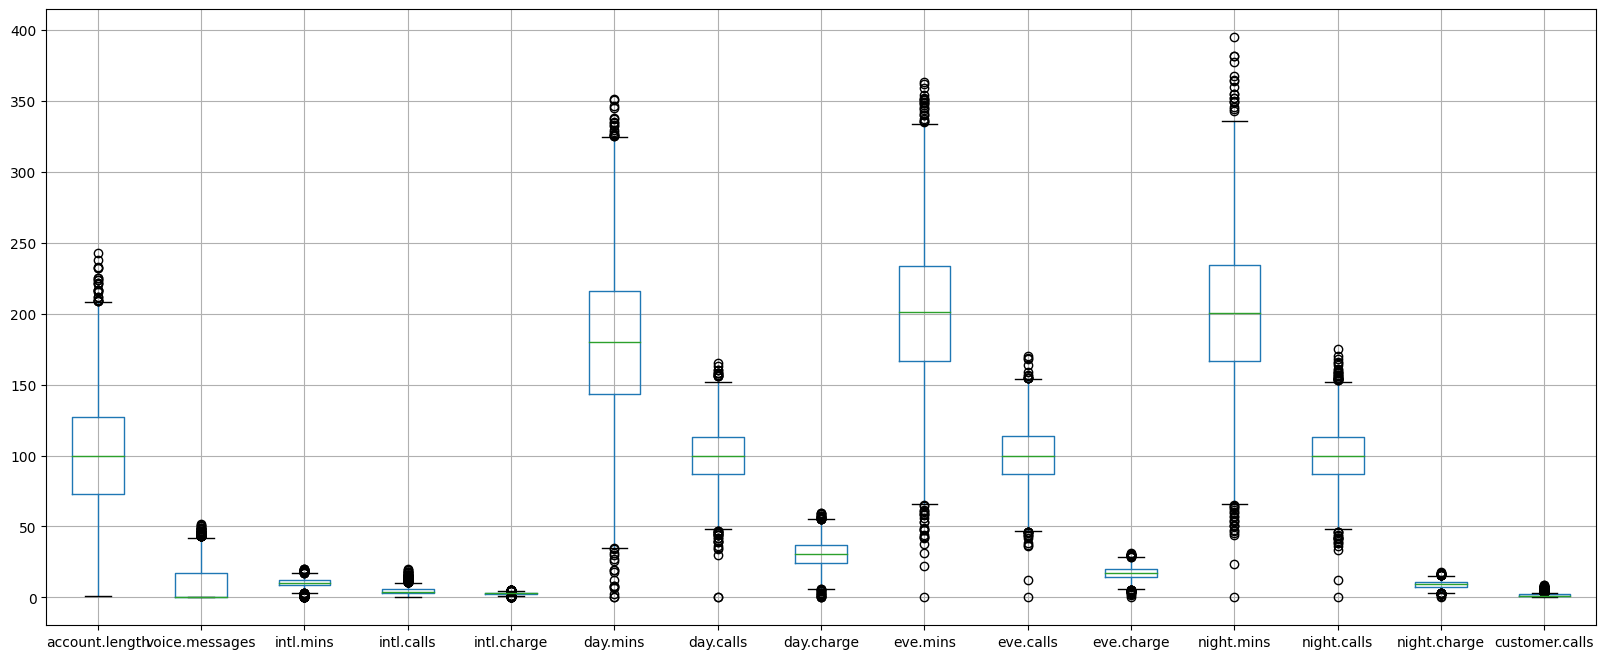

In [ ]:
plt.figure(figsize = (20,8))
df.boxplot()
plt.show()

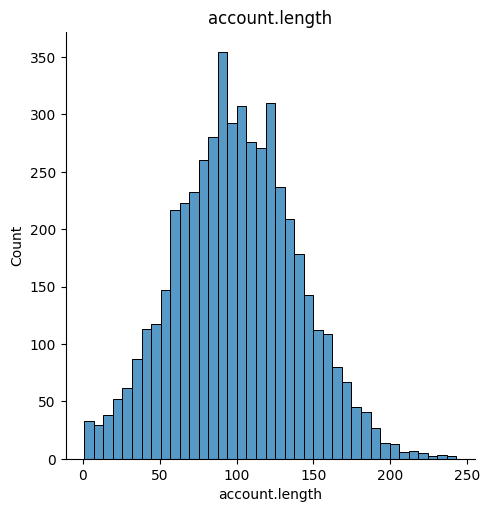

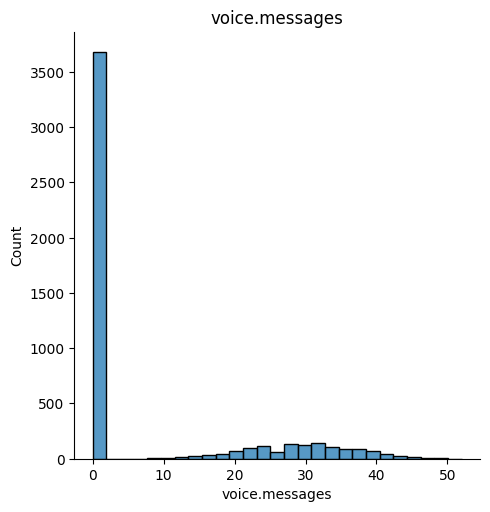

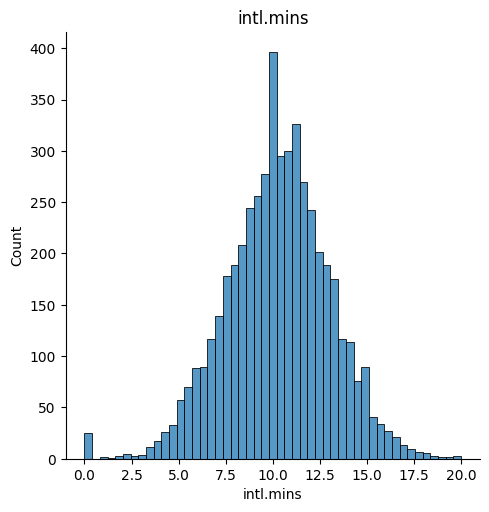

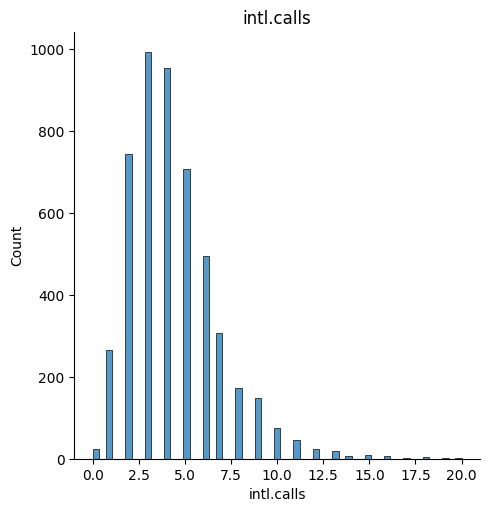

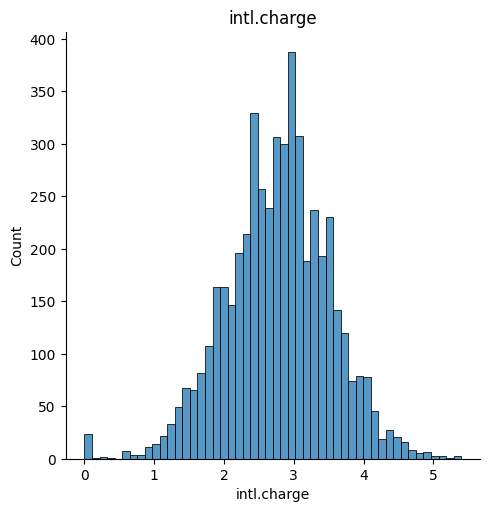

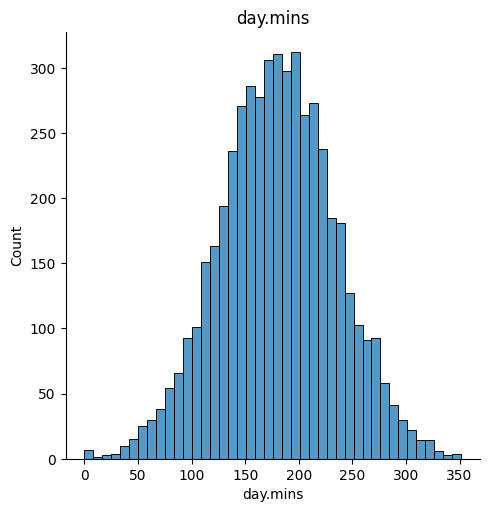

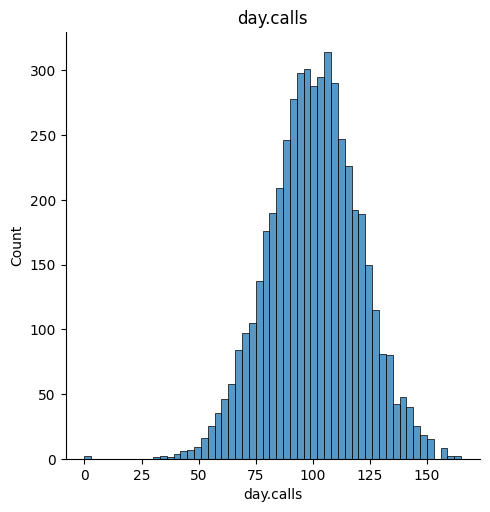

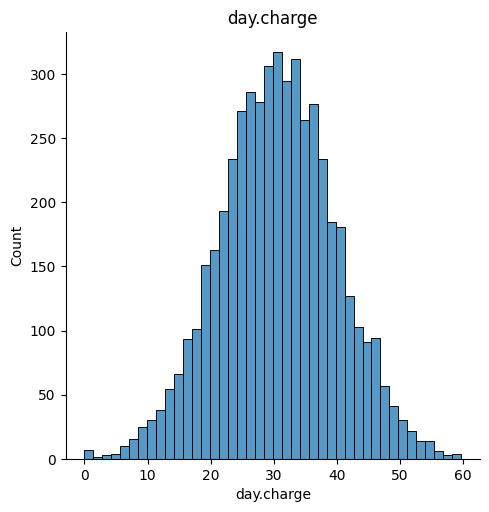

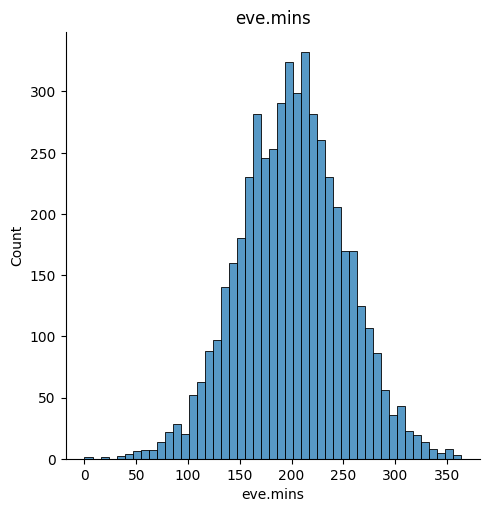

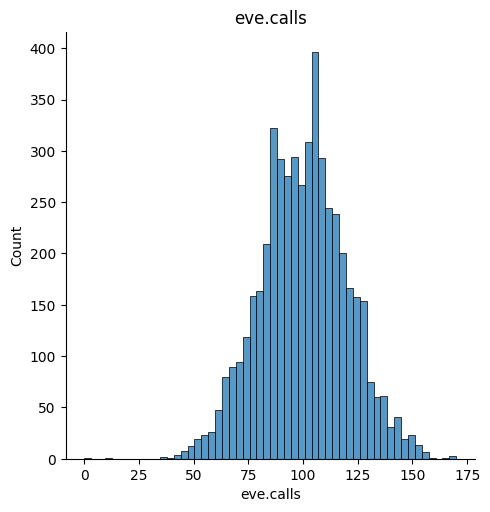

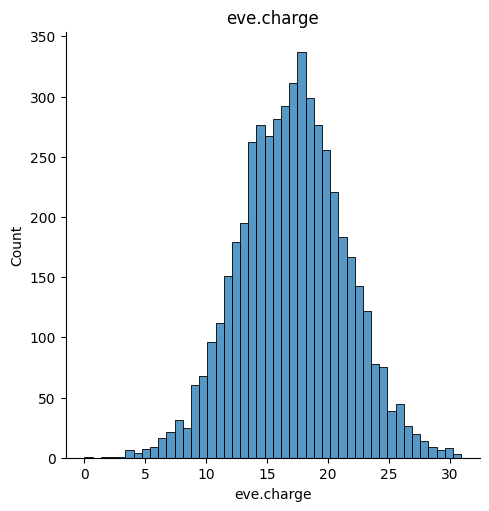

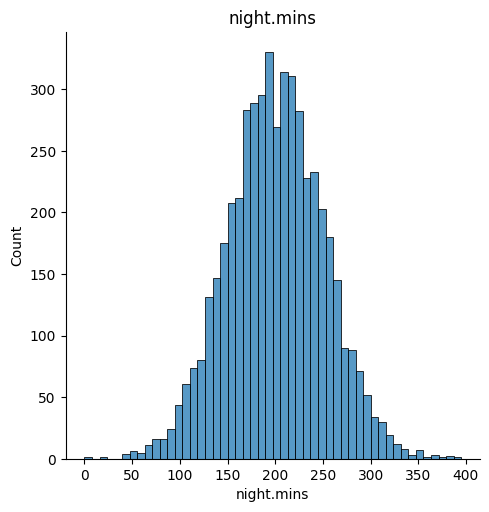

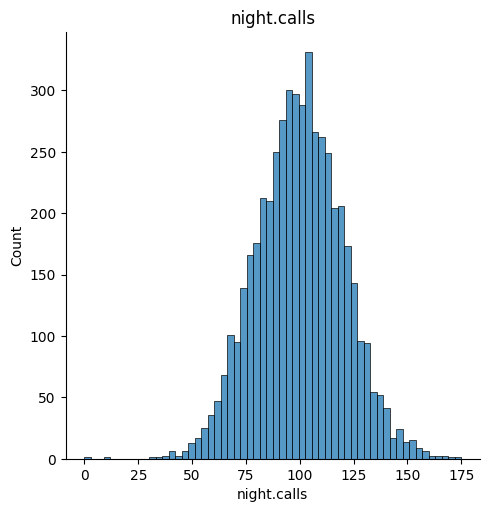

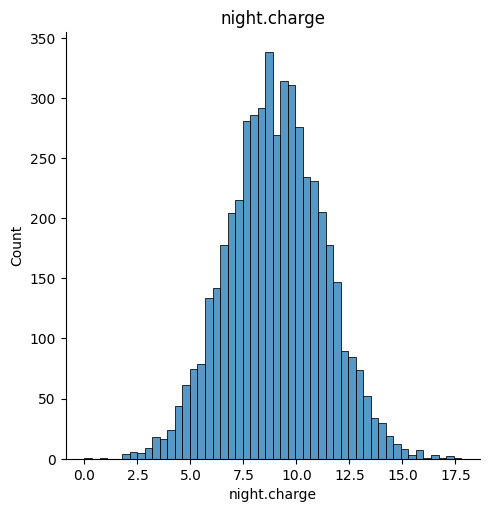

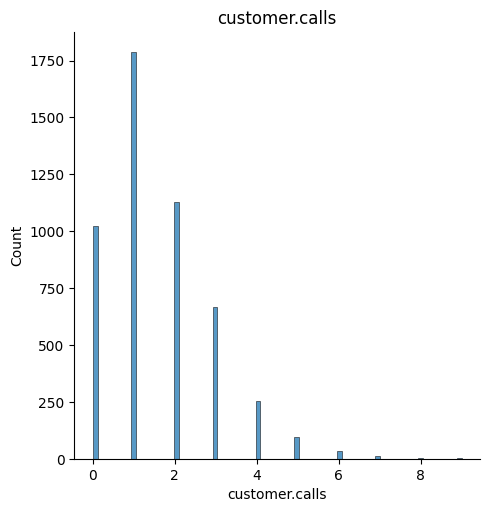

In [ ]:
for i in num:
    sns.displot(df[i])
    plt.title(i)
    plt.show()

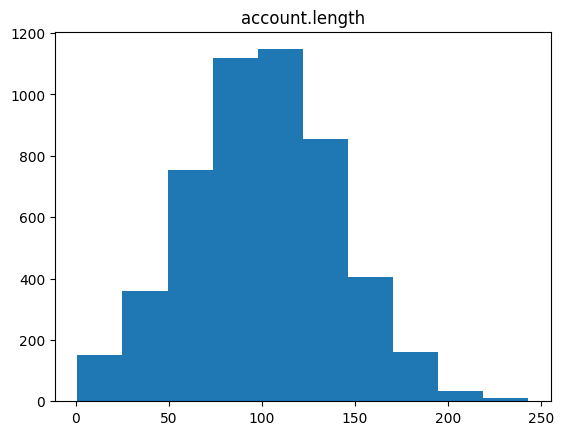

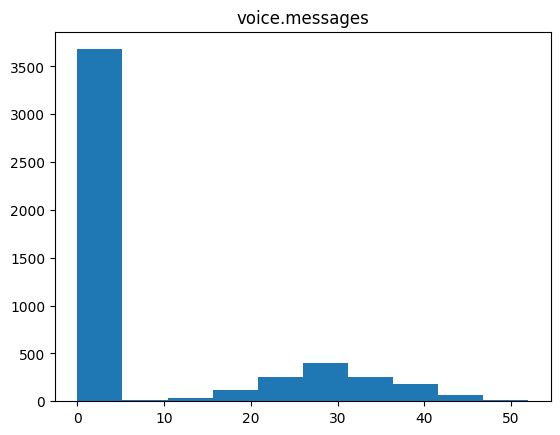

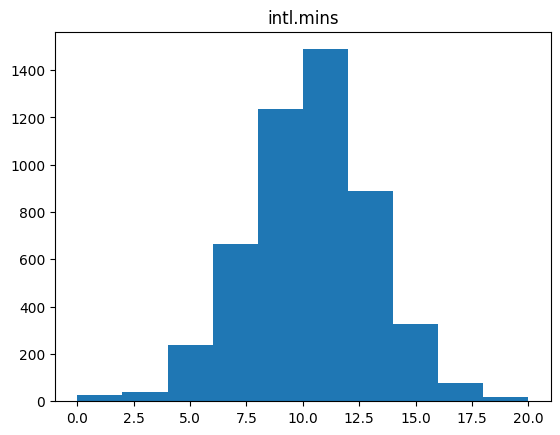

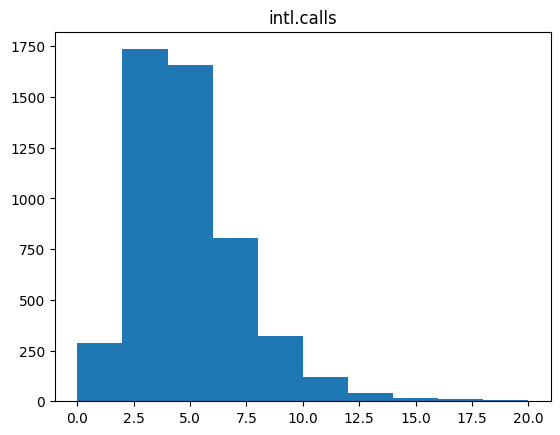

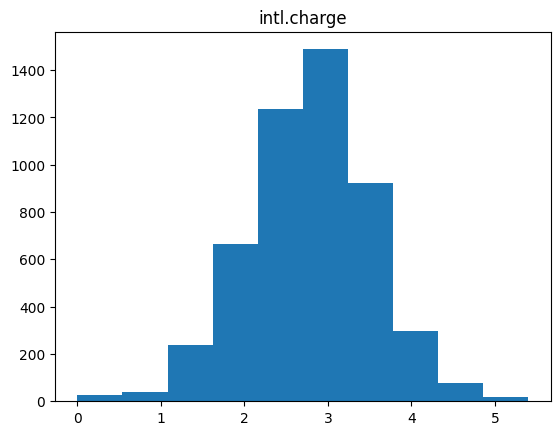

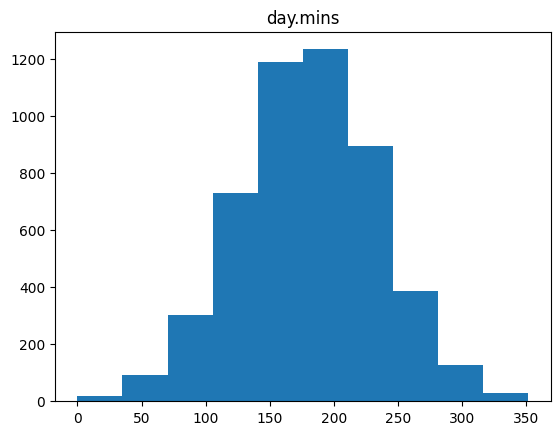

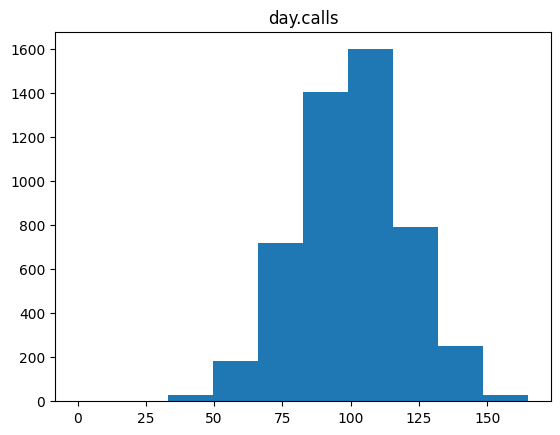

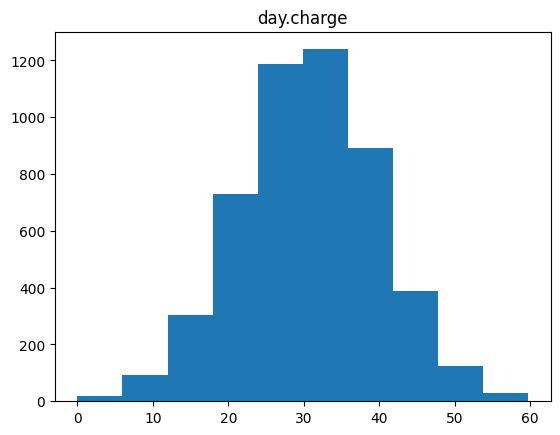

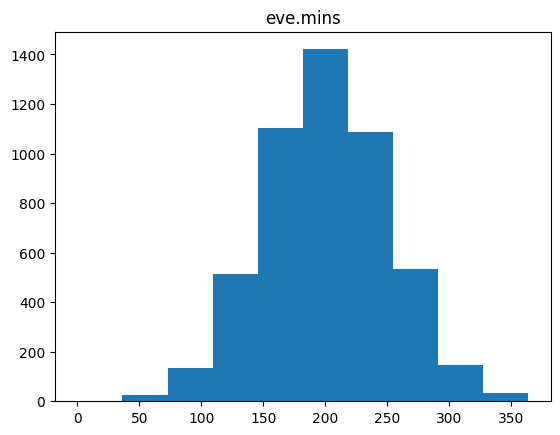

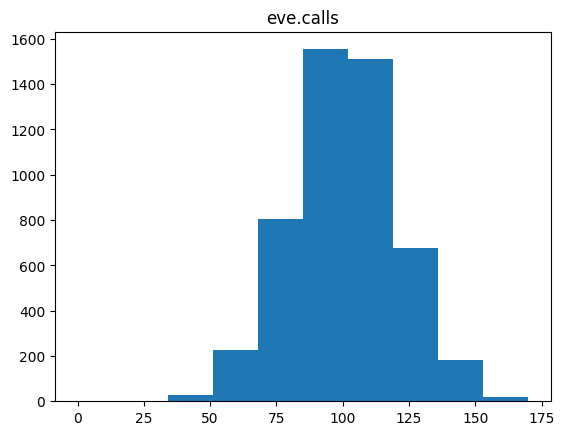

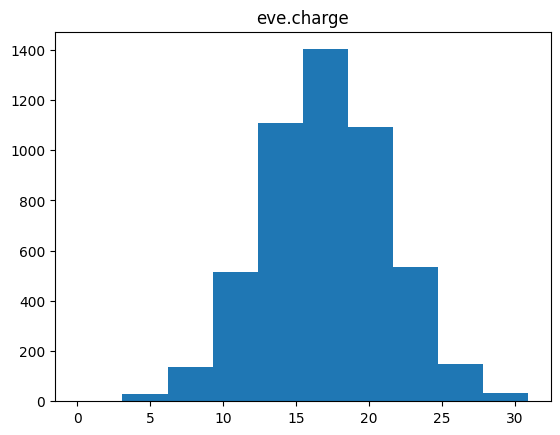

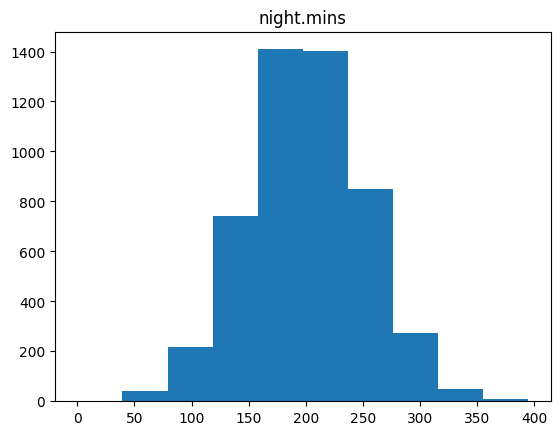

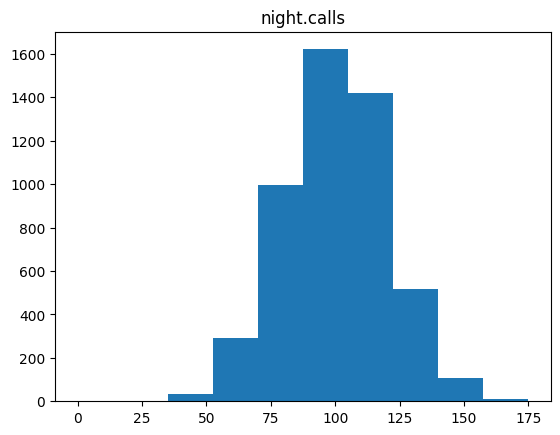

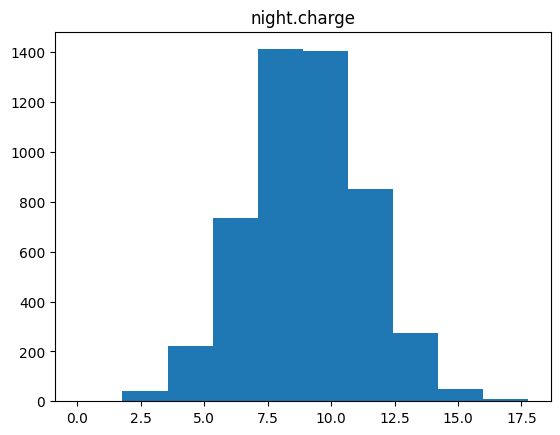

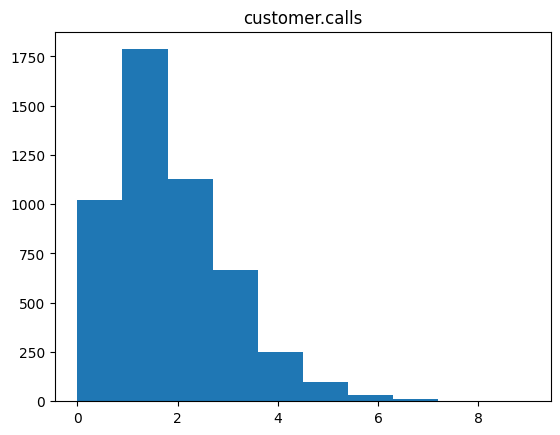

In [ ]:
for i in num:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

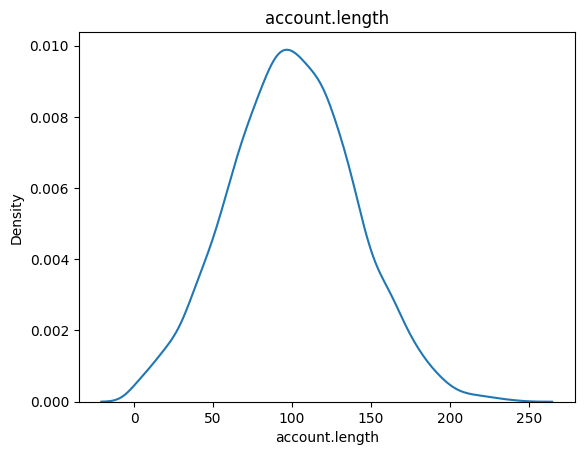

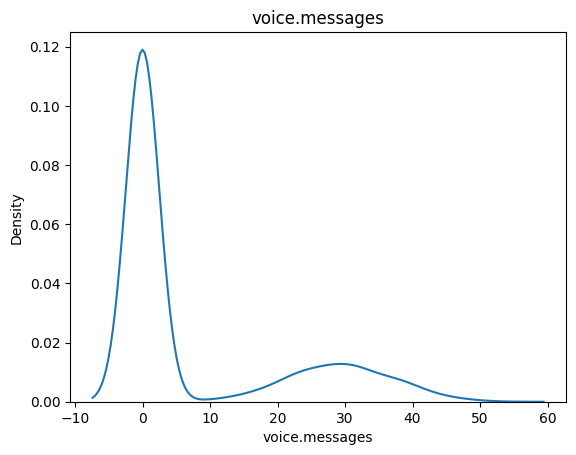

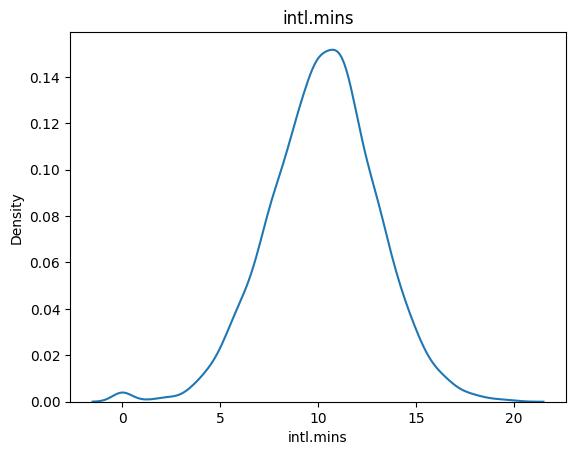

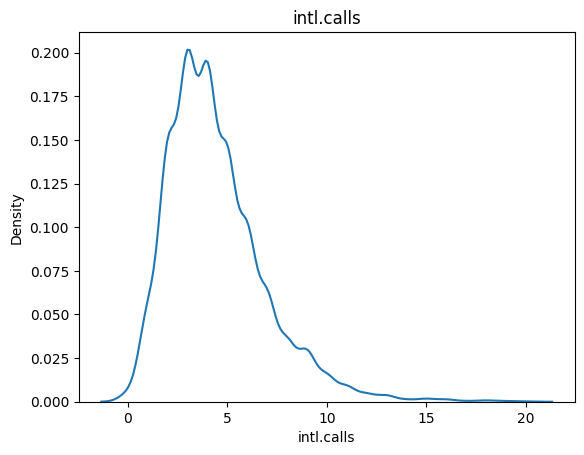

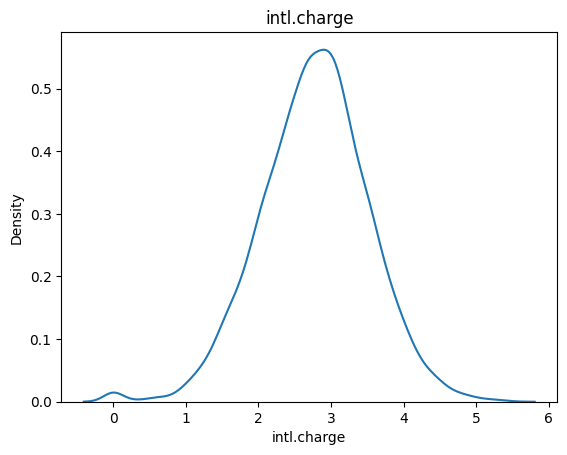

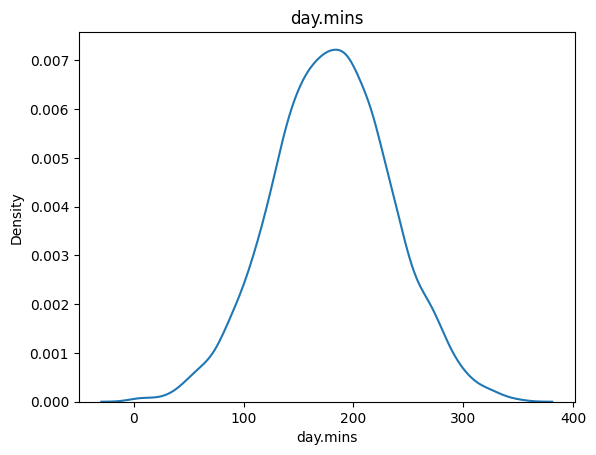

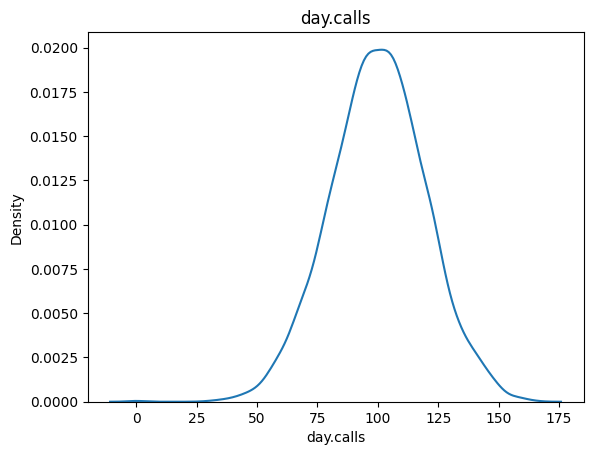

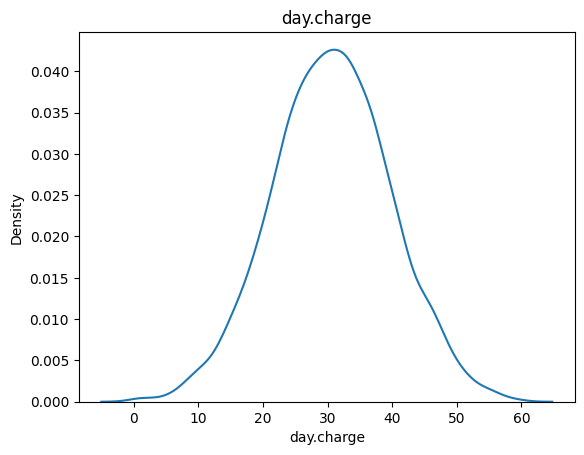

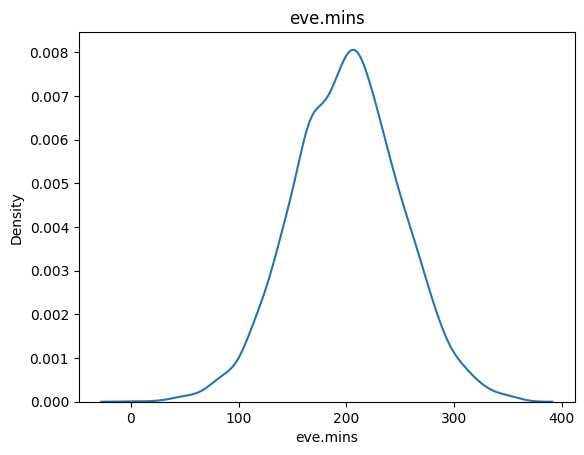

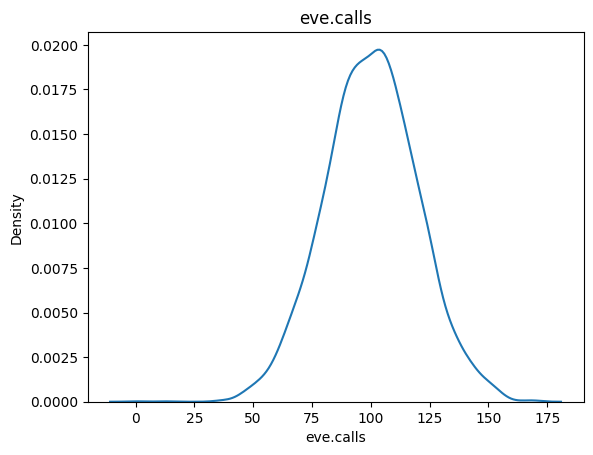

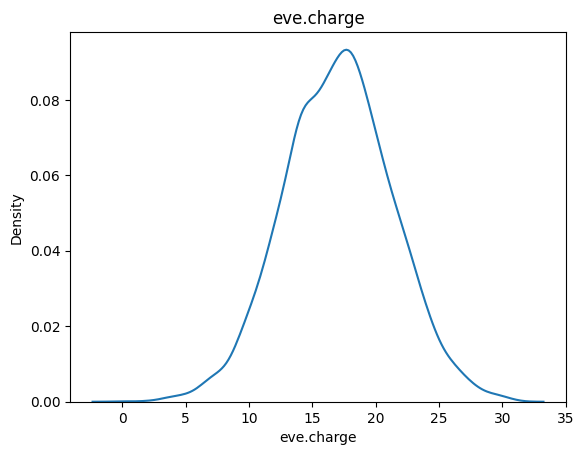

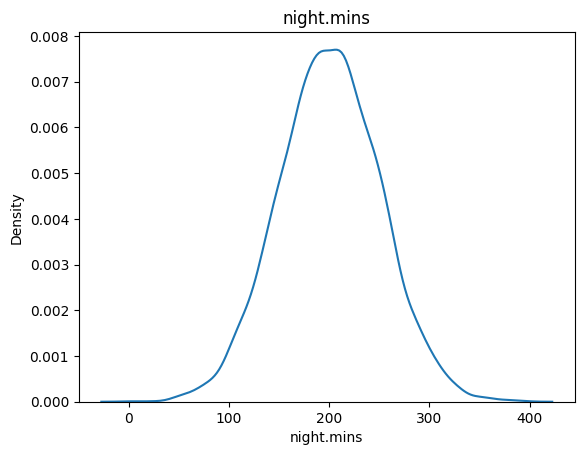

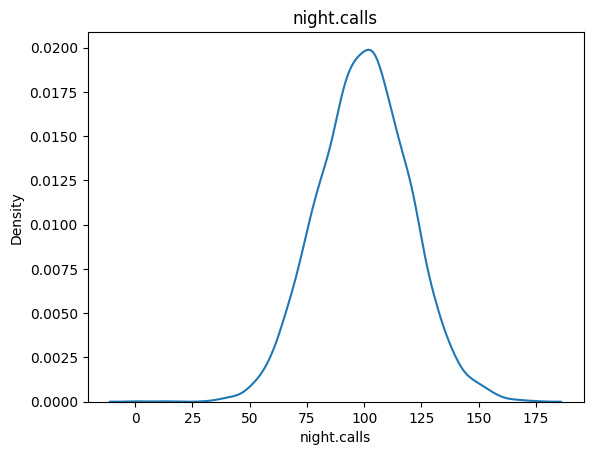

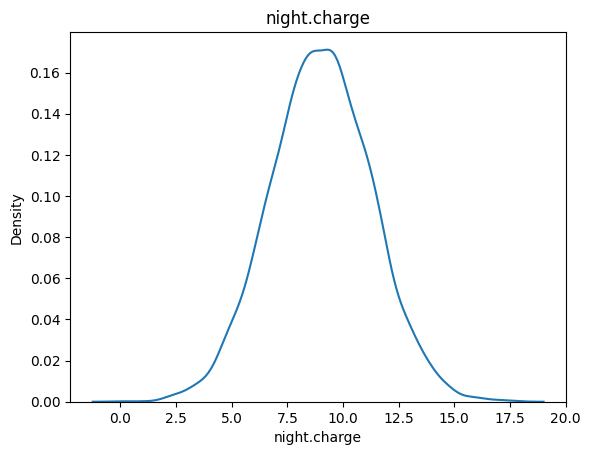

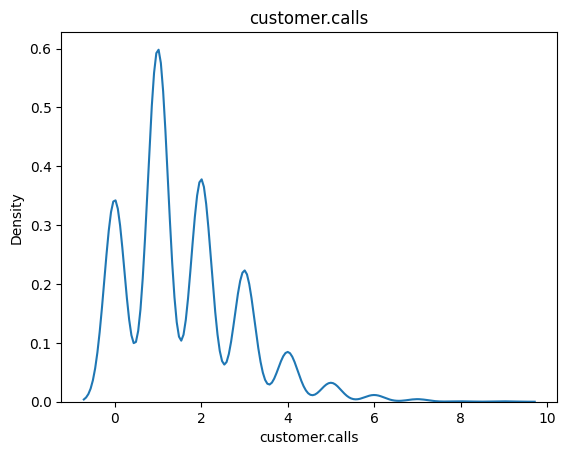

In [ ]:
for i in num:
    sns.kdeplot(df[i],legend='churn')
    plt.title(i)
    plt.show()

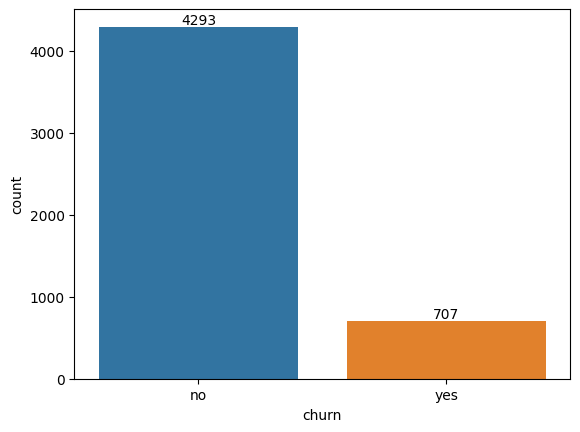

In [ ]:
ax = sns.countplot(data=df, x='churn')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [ ]:
# for i in obj:
#     if obj != 'State':
#         print(i)
#         plt.figure(figsize = (10,8))
#         ax = sns.countplot(df[i])
#         for label in ax.containers:
#             ax.bar_label(label)
#             plt.title(i)
            # plt.show()mj

# **Feature Engineering**

In [ ]:
corr=df.corr()
corr

account.length  voice.messages  intl.mins  intl.calls  \
account.length        1.000000       -0.014575   0.001291    0.014277   
voice.messages       -0.014575        1.000000   0.002463    0.000124   
intl.mins             0.001291        0.002463   1.000000    0.016791   
intl.calls            0.014277        0.000124   0.016791    1.000000   
intl.charge           0.001292        0.002505   0.999993    0.016900   
day.mins             -0.001017        0.005381  -0.019486   -0.001303   
day.calls             0.028240        0.000883   0.013097    0.010893   
day.charge           -0.000799        0.005141  -0.019282   -0.001597   
eve.mins             -0.008676        0.018869  -0.000356    0.007997   
eve.calls             0.009143       -0.003954  -0.007458    0.005574   
eve.charge           -0.009587        0.019496   0.000132    0.008393   
night.mins            0.000668        0.005541  -0.006721   -0.017214   
night.calls          -0.007825        0.002676   0.000391   -0.000156   
night.charge          0.000656        0.005535  -0.006717   -0.017182   
customer.calls       -0.001445       -0.007086  -0.012122   -0.019147   

                intl.charge  day.mins  day.calls  day.charge  eve.mins  \
account.length     0.001292 -0.001017   0.028240   -0.000799 -0.008676   
voice.messages     0.002505  0.005381   0.000883    0.005141  0.018869   
intl.mins          0.999993 -0.019486   0.013097   -0.019282 -0.000356   
intl.calls         0.016900 -0.001303   0.010893   -0.001597  0.007997   
intl.charge        1.000000 -0.019415   0.013161   -0.019212 -0.000333   
day.mins          -0.019415  1.000000   0.001935    0.999769 -0.010906   
day.calls          0.013161  0.001935   1.000000    0.001666 -0.001719   
day.charge        -0.019212  0.999769   0.001666    1.000000 -0.011530   
eve.mins          -0.000333 -0.010906  -0.001719   -0.011530  1.000000   
eve.calls         -0.007507  0.008128   0.003754    0.007983  0.003119   
eve.charge         0.000155 -0.010760  -0.000695   -0.011383  0.997671   
night.mins        -0.006655  0.011799   0.002804    0.011317 -0.016503   
night.calls        0.000368  0.004236  -0.008308    0.004207  0.015578   
night.charge      -0.006650  0.011783   0.002802    0.011301 -0.016504   
customer.calls    -0.012180  0.002733  -0.010739    0.002930 -0.012401   

                eve.calls  eve.charge  night.mins  night.calls  night.charge  \
account.length   0.009143   -0.009587    0.000668    -0.007825      0.000656   
voice.messages  -0.003954    0.019496    0.005541     0.002676      0.005535   
intl.mins       -0.007458    0.000132   -0.006721     0.000391     -0.006717   
intl.calls       0.005574    0.008393   -0.017214    -0.000156     -0.017182   
intl.charge     -0.007507    0.000155   -0.006655     0.000368     -0.006650   
day.mins         0.008128   -0.010760    0.011799     0.004236      0.011783   
day.calls        0.003754   -0.000695    0.002804    -0.008308      0.002802   
day.charge       0.007983   -0.011383    0.011317     0.004207      0.011301   
eve.mins         0.003119    0.997671   -0.016503     0.015578     -0.016504   
eve.calls        1.000000    0.002778    0.001781    -0.013682      0.001799   
eve.charge       0.002778    1.000000   -0.016649     0.013422     -0.016652   
night.mins       0.001781   -0.016649    1.000000     0.026972      0.999999   
night.calls     -0.013682    0.013422    0.026972     1.000000      0.026949   
night.charge     0.001799   -0.016652    0.999999     0.026949      1.000000   
customer.calls   0.006235   -0.013836   -0.008533    -0.008283     -0.008530   

                customer.calls  
account.length       -0.001445  
voice.messages       -0.007086  
intl.mins            -0.012122  
intl.calls           -0.019147  
intl.charge          -0.012180  
day.mins              0.002733  
day.calls            -0.010739  
day.charge            0.002930  
eve.mins             -0.012401  
eve.calls             0.006235  
eve.charge        

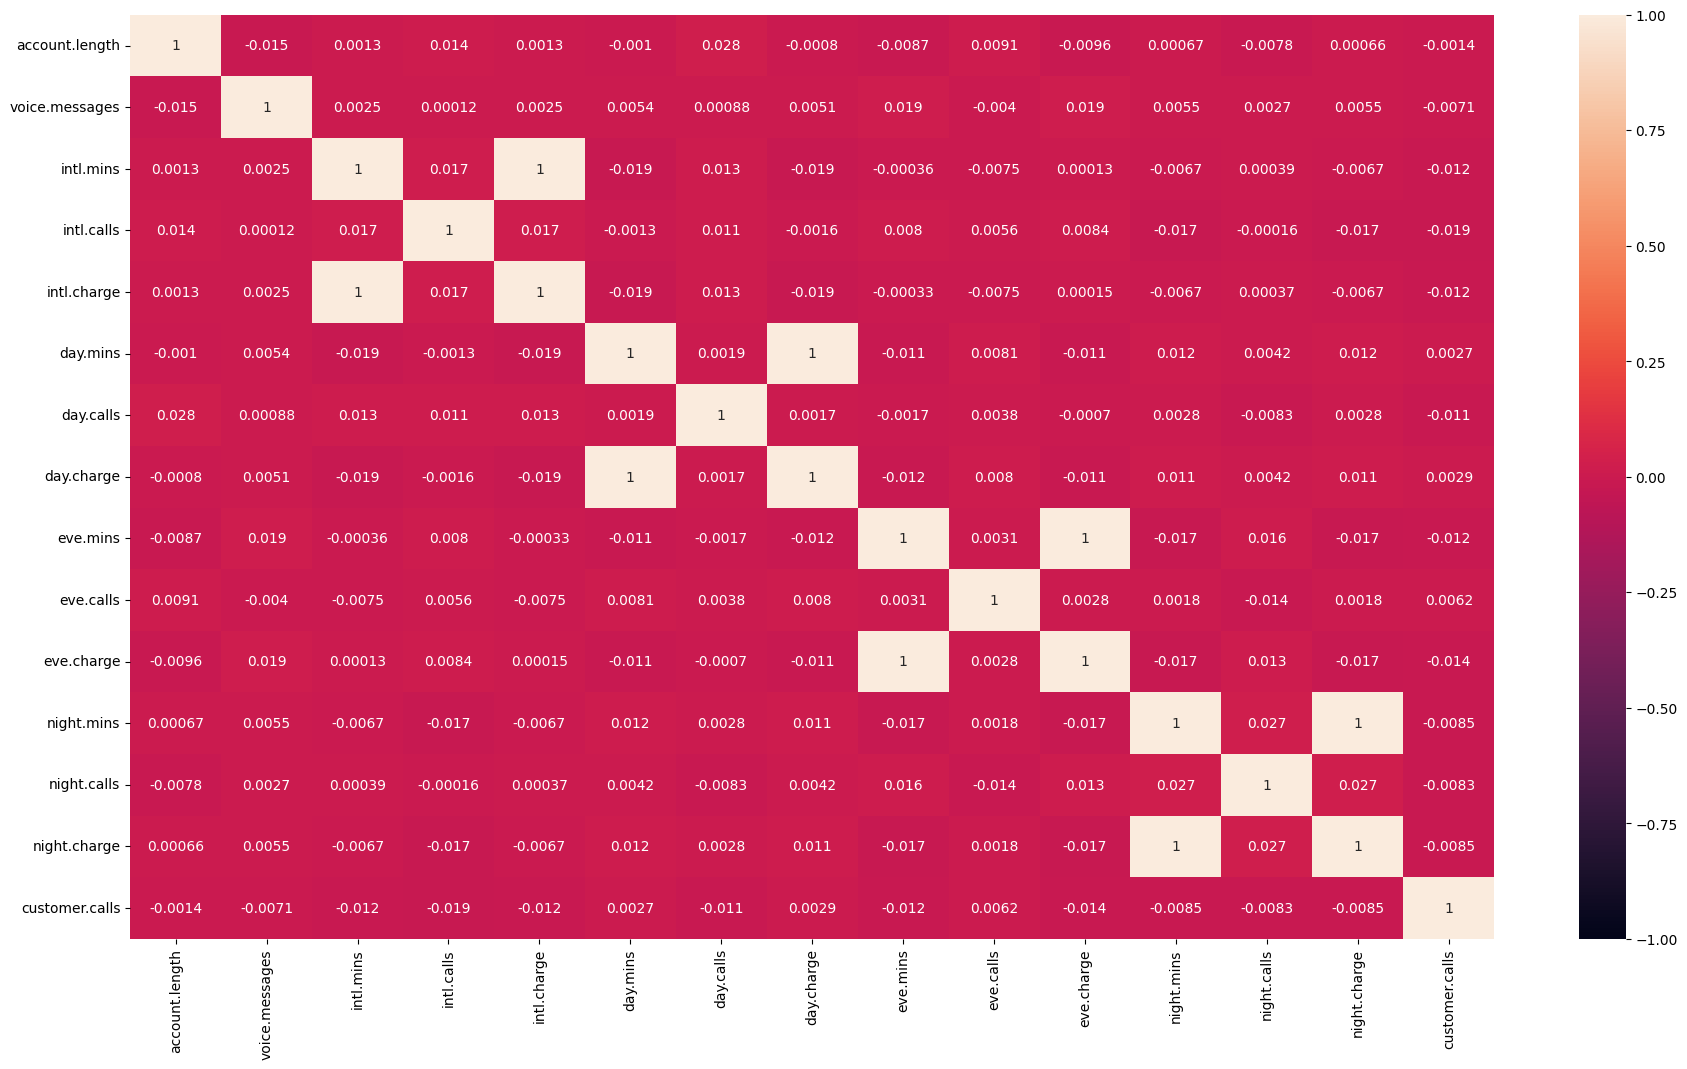

In [ ]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot = True,vmin = -1,vmax = 1)
plt.show()

In [ ]:
df.head()

area.code  account.length voice.plan  voice.messages intl.plan  \
0  area_code_415             128        yes              25        no   
1  area_code_415             107        yes              26        no   
2  area_code_415             137         no               0        no   
3  area_code_408              84         no               0       yes   
4  area_code_415              75         no               0       yes   

   intl.mins  intl.calls  intl.charge  day.mins  day.calls  day.charge  \
0       10.0           3         2.70     265.1        110       45.07   
1       13.7           3         3.70     161.6        123       27.47   
2       12.2           5         3.29     243.4        114       41.38   
3        6.6           7         1.78     299.4         71       50.90   
4       10.1           3         2.73     166.7        113       28.34   

   eve.mins  eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0     197.4         99       16.78       244.7           91         11.01   
1     195.5        103       16.62       254.4          103         11.45   
2     121.2        110       10.30       162.6          104          7.32   
3      61.9         88        5.26       196.9           89          8.86   
4     148.3        122       12.61       186.9          121          8.41   

   customer.calls churn  
0               1    no  
1               1    no  
2               0    no  
3               2    no  
4               3    no

# Categorical Encoding

In [ ]:
df['area.code'].value_counts()

area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: area.code, dtype: int64

In [ ]:
new_df1=pd.get_dummies(df,columns=['area.code'],drop_first=True)
new_df1.head()

account.length voice.plan  voice.messages intl.plan  intl.mins  intl.calls  \
0             128        yes              25        no       10.0           3   
1             107        yes              26        no       13.7           3   
2             137         no               0        no       12.2           5   
3              84         no               0       yes        6.6           7   
4              75         no               0       yes       10.1           3   

   intl.charge  day.mins  day.calls  day.charge  eve.mins  eve.calls  \
0         2.70     265.1        110       45.07     197.4         99   
1         3.70     161.6        123       27.47     195.5        103   
2         3.29     243.4        114       41.38     121.2        110   
3         1.78     299.4         71       50.90      61.9         88   
4         2.73     166.7        113       28.34     148.3        122   

   eve.charge  night.mins  night.calls  night.charge  customer.calls churn  \
0       16.78       244.7           91         11.01               1    no   
1       16.62       254.4          103         11.45               1    no   
2       10.30       162.6          104          7.32               0    no   
3        5.26       196.9           89          8.86               2    no   
4       12.61       186.9          121          8.41               3    no   

   area.code_area_code_415  area.code_area_code_510  
0                        1                        0  
1                        1                        0  
2                        1                        0  
3                        0                        0  
4                        1                        0

In [ ]:
new_df1['churn']=new_df1.churn.replace({'yes':1,'no':0})
new_df1['voice.plan']=new_df1['voice.plan'].replace({'yes':1,'no':0})
new_df1['intl.plan']=new_df1['intl.plan'].replace({'yes':1,'no':0})


In [ ]:
new_df1.head()

account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
0             128           1              25          0       10.0   
1             107           1              26          0       13.7   
2             137           0               0          0       12.2   
3              84           0               0          1        6.6   
4              75           0               0          1       10.1   

   intl.calls  intl.charge  day.mins  day.calls  day.charge  eve.mins  \
0           3         2.70     265.1        110       45.07     197.4   
1           3         3.70     161.6        123       27.47     195.5   
2           5         3.29     243.4        114       41.38     121.2   
3           7         1.78     299.4         71       50.90      61.9   
4           3         2.73     166.7        113       28.34     148.3   

   eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0         99       16.78       244.7           91         11.01   
1        103       16.62       254.4          103         11.45   
2        110       10.30       162.6          104          7.32   
3         88        5.26       196.9           89          8.86   
4        122       12.61       186.9          121          8.41   

   customer.calls  churn  area.code_area_code_415  area.code_area_code_510  
0               1      0                        1                        0  
1               1      0                        1                        0  
2               0      0                        1                        0  
3               2      0                        0                        0  
4               3      0                        1                        0

In [ ]:
# new_df=new_df.drop(columns=['voice.plan','intl.calls','day.calls','night.calls','eve.calls','customer.calls'])

In [ ]:
# new_df.head()

In [ ]:
x=new_df1.drop(columns=['churn'])
y=new_df1['churn']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std=StandardScaler()

In [ ]:
df=std.fit_transform(x)

In [ ]:
new_df=pd.DataFrame(df,columns=x.columns)

In [ ]:
new_df.head()

account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
0        0.698941    1.667120        1.273145  -0.323240  -0.094809   
1        0.169849    1.667120        1.346973  -0.323240   1.245227   
2        0.925695   -0.599837       -0.572549  -0.323240   0.701969   
3       -0.409634   -0.599837       -0.572549   3.093675  -1.326194   
4       -0.636388   -0.599837       -0.572549   3.093675  -0.058592   

   intl.calls  intl.charge  day.mins  day.calls  day.charge  eve.mins  \
0   -0.584236    -0.095509  1.573802   0.502824    1.574027 -0.063106   
1   -0.584236     1.245982 -0.346802   1.158422   -0.347576 -0.100784   
2    0.229917     0.695971  1.171125   0.704546    1.171146 -1.574169   
3    1.044069    -1.329681  2.210292  -1.463971    2.210558 -2.750100   
4   -0.584236    -0.055264 -0.252163   0.654116   -0.252588 -1.036770   

   eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0  -0.060077   -0.063849    0.876999    -0.446928      0.876286   
1   0.141693   -0.101089    1.068992     0.154374      1.069818   
2   0.494791   -1.572084   -0.748012     0.204483     -0.746737   
3  -0.614946   -2.745155   -0.069110    -0.547145     -0.069377   
4   1.100103   -1.034426   -0.267041     1.056327     -0.267307   

   customer.calls  area.code_area_code_415  area.code_area_code_510  
0       -0.436676                 1.002002                -0.576119  
1       -0.436676                 1.002002                -0.576119  
2       -1.202236                 1.002002                -0.576119  
3        0.328885                -0.998002                -0.576119  
4        1.094445                 1.002002                -0.576119

In [ ]:
new_df.shape

(5000, 19)

As of now the feature engoneering part completed with better results for the model implementations we can start our predictive moddelling for the future benefits.

## Smote analysis

In [ ]:
from collections import Counter

In [ ]:
print(sorted(Counter(new_df1['churn']).items()))

[(0, 4293), (1, 707)]


In [ ]:
from imblearn import under_sampling, over_sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
r=RandomOverSampler(random_state=0)
x_resampled,y_resampled=r.fit_resample(x,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 4293), (1, 4293)] (8586,)


In [ ]:
# from imblearn.combine import SMOTEENN
# from sklearn.datasets import make_classification

In [ ]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
# x,y=make_classification()

In [ ]:
# smote_enn=SMOTEENN(sampling_strategy='auto',random_state=0)


In [ ]:
# x_resample,y_resample=smote_enn.fit_resample(x,y)

In [ ]:
# sm=SMOTEENN()
# x_resample,y_resample=sm.fit_sample(x,y)

In [ ]:
# x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.25,random_state=0)

# **MODELLING**

# **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=0)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
accuracy=accuracy_score(y_test,y_pred)

In [ ]:

accuracy

0.7176949941792782

In [ ]:
cls_report=classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       849
           1       0.71      0.74      0.73       869

    accuracy                           0.72      1718
   macro avg       0.72      0.72      0.72      1718
weighted avg       0.72      0.72      0.72      1718



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[628, 221],
       [239, 630]])

The logistic regression with 0.72 accuracy

and also the confusion matric got better for trrue positive and true negative

# **2. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9359720605355064

Selecting k value

To know the best k value we have two methods to know k value

1. heuristic approach

2. Experimental Approach

Here we used Experimental Approach to define the best k value

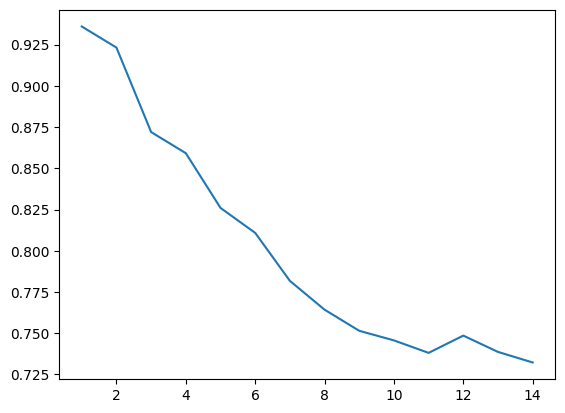

In [ ]:
scores=[]
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  scores.append(accuracy_score(y_test,y_pred))

plt.plot(range(1,15),scores)

Here we notify that the k value uis maintained with better accuracy on model with neighbors of 1

so we have taken 1 neighbors for this model

# **3. Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from IPython.display import Image, display

In [ ]:
rf=RandomForestClassifier(n_estimators=100)

In [ ]:
model=rf.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.989522700814901

In [ ]:
cls_report=classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       849
           1       0.98      1.00      0.99       869

    accuracy                           0.99      1718
   macro avg       0.99      0.99      0.99      1718
weighted avg       0.99      0.99      0.99      1718



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[833,  16],
       [  2, 867]])

# AUC ROC

 To evaluate the performance of binary classification models. They provide insights into how well a model is capable of distinguishing between the two classes.

In [ ]:
false_positive_rate, true_positive_rate,thresholds=roc_curve(y_test, y_pred)
roc_auc=auc(false_positive_rate, true_positive_rate)
roc_auc

0.9894264016015594

In [ ]:
tree_to_display = rf.estimators_[0]

# Export the decision tree to DOT format
dot_data = export_graphviz(tree_to_display, out_file=None,
                        filled=True, rounded=True,
                           special_characters=True)

# Create a Graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

plt.figure(figsize=(16, 10))  # Specify the width and height of the figure

# Convert the Graph to an image (PNG format)
image = Image(graph.create_png())

# Display the image
display(image)

<Figure size 1600x1000 with 0 Axes>

# Checking for overfitting

In [ ]:
train_predictions=model.predict(x_train)
test_predictions=model.predict(x_test)

In [ ]:
train_accuracy=accuracy_score(y_train,train_predictions)
test_accuracy=accuracy_score(y_test,test_predictions)

In [ ]:
train_accuracy

1.0

In [ ]:
test_accuracy

0.989522700814901

We conclude that  as of now theres no overfitting occurs for the model evaluation

# **hyper parameter tuning**

# **4. Gridsearch CV**

In [ ]:
n_estimators=[20,60,100,160]
max_features=[0.2,0.6,1.0]
max_depth=[2,8,None]
max_samples=[0.5,0.75,1.0]

In [ ]:
param_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'max_samples':max_samples}
print(param_grid)

{'n_estimators': [20, 60, 100, 160], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)

In [ ]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 160]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 20}

In [ ]:
rf_grid.best_score_

0.9892251373176386

# **5. Naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec=CountVectorizer()

In [ ]:
NBclassifier=GaussianNB()
NBclassifier.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=NBclassifier.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.818975552968568

# **6. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [ ]:
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Evaluate the classifier's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


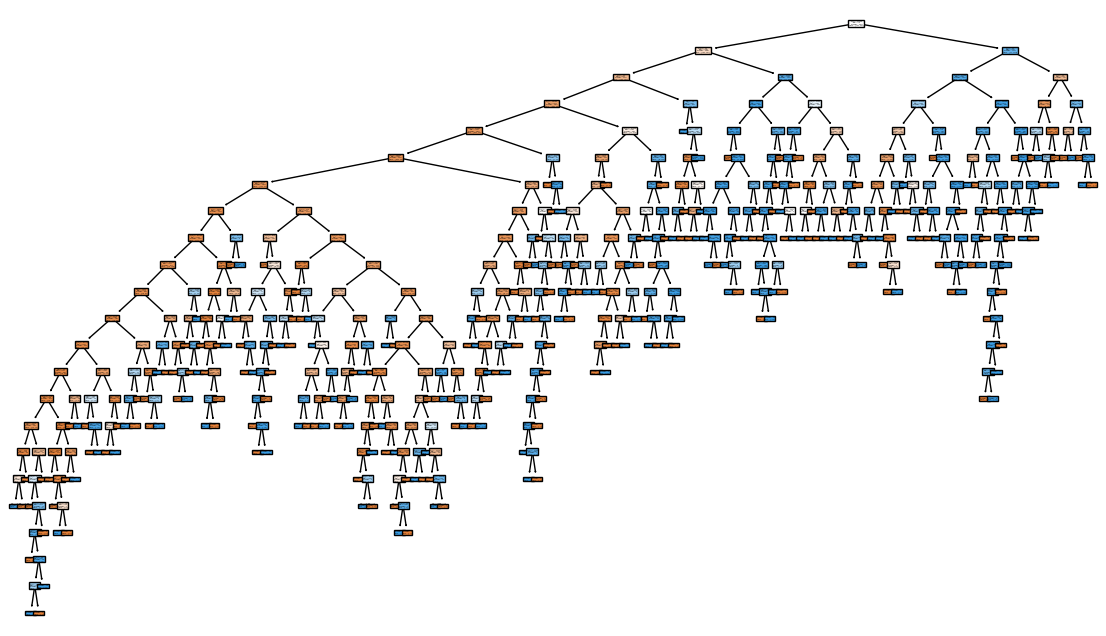

In [ ]:
plt.figure(figsize=(14,8))  # Set the figure size (adjust as needed)
plot_tree(clf, filled=True)
plt.show()

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[789,  60],
       [  6, 863]])

#**MODELLING CONCLUSION**

Here all the machine learning algorithms we have used for the predictive modelling

According to all the algorithms **Random Forest Classifier** performs better with Accuracy of 0.98

# **CONCLUSION**

In this comprehensive analysis of telecom churn, we have examined various aspects of customer attrition within the telecommunications industry. Our investigation included data preprocessing, exploratory data analysis, feature engineering, model development, and evaluation. Here are the key takeaways and conclusions from our analysis:

**Understanding Churn Patterns:** We started by gaining a deep understanding of the churn patterns in the telecom industry. Churn, the phenomenon where customers switch to a different provider, is a critical issue for telecom companies, as it directly impacts revenue and profitability.


**Data Preprocessing**: The success of any data-driven analysis depends on the quality of the data. We performed data preprocessing tasks, including handling missing values, encoding categorical features, and scaling numerical features, to prepare the dataset for modeling.


**Exploratory Data Analysis (EDA):** EDA allowed us to uncover insights from the data. We identified important trends and patterns related to customer demographics, usage, and behavior. This information helped us understand factors that might influence churn.


**Feature Engineering:** Feature engineering involved creating new features or transforming existing ones to improve model performance. We engineered features such as customer lifetime, usage-based metrics, and customer segmentation.


**Model Development:** We built predictive models to forecast customer churn. Commonly used machine learning algorithms like logistic regression, decision trees, random forests, and gradient boosting were employed. These models were trained on historical data to predict which customers were more likely to churn.


**Model Evaluation:** Model evaluation is crucial for assessing how well the models perform. We used metrics such as accuracy, precision, recall, F1-score, and the ROC curve to measure the effectiveness of our models. Additionally, we considered business-specific metrics like customer lifetime value and cost of acquisition to weigh the financial implications of churn prediction.


**Interpretability:** Model interpretability is essential for understanding the factors that contribute to churn predictions. We used techniques like feature importance and SHAP (SHapley Additive exPlanations) values to interpret the model's decisions and identify the most influential features.


**Actionable Insights:** Our analysis provided actionable insights for telecom companies. By identifying high-risk customers and understanding the reasons behind churn, telecom providers can take proactive measures to retain customers. Strategies might include targeted marketing campaigns, personalized offers, or improvements in service quality.


**Continuous Monitoring:**Churn analysis is an ongoing process. To maintain customer retention, telecom companies should continuously monitor churn patterns, update predictive models, and adapt their strategies to changing market conditions.


**Future Directions:** The telecom industry is evolving rapidly, with the introduction of 5G technology, IoT (Internet of Things) devices, and emerging competitors. Future churn analysis should incorporate these dynamics and explore advanced techniques such as deep learning and predictive analytics.
